# Business Problem:

- Prediction of various Forest cover types from the aforementioned categories given in the data using Cartographic variables as the target variable to get accurate predictions viable for state, private and federal agencies.
- Which one among Elevation, Slope & Aspect actually turn out to improve predictions in the best possible way?


# Understanding the variables

- The azimuth is the angular direction of the sun, measured from north in clockwise degrees from 0 to 360. An azimuth of 90 degrees is east. The default azimuth is 315 degrees (NW).

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, LabelEncoder, PowerTransformer, MinMaxScaler
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, KFold, cross_val_score, StratifiedKFold, cross_val_predict, GroupKFold
from sklearn.metrics import classification_report, cohen_kappa_score, confusion_matrix, f1_score
from xgboost.sklearn import XGBClassifier

import warnings
warnings.filterwarnings('ignore')

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

path = '/content/drive/My Drive/Colab Notebooks/covtype_rem_dummies.csv'
df = pd.read_csv('covtype_rem_dummies.csv')

In [ ]:
df.head()

,Unnamed: 0,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Forest_Cover_Type_designation,Soil_types,Winderness_types
0,0,2596,51,3,258,0,510,221,232,148,6279,5,Soil_Type_29,Wilderness_Area_1
1,1,2590,56,2,212,-6,390,220,235,151,6225,5,Soil_Type_29,Wilderness_Area_1
2,2,2804,139,9,268,65,3180,234,238,135,6121,2,Soil_Type_12,Wilderness_Area_1
3,3,2785,155,18,242,118,3090,238,238,122,6211,2,Soil_Type_30,Wilderness_Area_1
4,4,2595,45,2,153,-1,391,220,234,150,6172,5,Soil_Type_29,Wilderness_Area_1


In [ ]:
df = df.drop(columns='Unnamed: 0')
df = df[(df['Forest_Cover_Type_designation'] == 1) | (df['Forest_Cover_Type_designation'] == 2) | (df['Forest_Cover_Type_designation'] == 3) | (df['Forest_Cover_Type_designation'] == 7)]

# doesn't give any meaning currently.

Without Transformation, it will behave like Binary Classification

That's why we run Sensitivity Analysis

Pilot Study - Pivotal Study - Then derive the best method

Summary Table of Negative and Positive findings.

Hinge Law - Measure of error

Sensitivty Analysis

Multiclass SVM

# Unused Codes

In [ ]:
'''acc = []

tra = []
testa = []
for i in range(10, 31):
    dt = DecisionTreeClassifier(criterion = 'gini', random_state=0, max_depth = i)
    dt_bag = BaggingClassifier(base_estimator = dt, n_jobs=-1, random_state=0)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 123)

    model_bg = Pipeline([('sc', StandardScaler()), ('Bagged Decision Tree', dt_bag)]).fit(X_train, y_train)

    y_pred = model_bg.predict(X_test)

    print('cohens kappa score:', cohen_kappa_score(y_test, y_pred))

    print(classification_report(y_test, y_pred))




    print('Training Accuracy', model_bg.score(X_train,y_train))
    print('Testing Accuracy', model_bg.score(X_test,y_test))

    tr = model_bg.score(X_train,y_train)
    tes = model_bg.score(X_test,y_test)

    tra.append(tr)
    testa.append(tes)'''

"acc = []\n\ntra = []\ntesta = []\nfor i in range(10, 31):\n    dt = DecisionTreeClassifier(criterion = 'gini', random_state=0, max_depth = i)\n    dt_bag = BaggingClassifier(base_estimator = dt, n_jobs=-1, random_state=0)\n\n    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 123)\n\n    model_bg = Pipeline([('sc', StandardScaler()), ('Bagged Decision Tree', dt_bag)]).fit(X_train, y_train)\n\n    y_pred = model_bg.predict(X_test)\n\n    print('cohens kappa score:', cohen_kappa_score(y_test, y_pred))\n\n    print(classification_report(y_test, y_pred))\n\n\n\n\n    print('Training Accuracy', model_bg.score(X_train,y_train))\n    print('Testing Accuracy', model_bg.score(X_test,y_test))\n\n    tr = model_bg.score(X_train,y_train)\n    tes = model_bg.score(X_test,y_test)\n\n    tra.append(tr)\n    testa.append(tes)"

In [ ]:
'''from sklearn.model_selection import learning_curve
dt = DecisionTreeClassifier(criterion = 'gini', random_state=0)
dt_bag = BaggingClassifier(base_estimator = dt, n_jobs=-1, random_state=0,n_estimators=10)

train_sizes, train_scores, validation_scores = learning_curve(estimator = dt_bag, X = X, y=y
                                                              , train_sizes = [0.2, 0.8]
                                                              , cv = 5, scoring = 'f1_weighted', n_jobs=-1)'''

"from sklearn.model_selection import learning_curve\ndt = DecisionTreeClassifier(criterion = 'gini', random_state=0)\ndt_bag = BaggingClassifier(base_estimator = dt, n_jobs=-1, random_state=0,n_estimators=10)\n\ntrain_sizes, train_scores, validation_scores = learning_curve(estimator = dt_bag, X = X, y=y\n                                                              , train_sizes = [0.2, 0.8]\n                                                              , cv = 5, scoring = 'f1_weighted', n_jobs=-1)"

In [ ]:
'''train_sizes = [i for i in range(3,32,1)]
plt.plot(train_sizes, tr, label = 'Training error')
plt.plot(train_sizes, tes, label = 'Validation error')
plt.ylabel('Accuracy', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curves for a bagged DT model', fontsize = 18, y = 1.03)
plt.legend()
plt.grid()
plt.ylim(0.6,1.01)'''

"train_sizes = [i for i in range(3,32,1)]\nplt.plot(train_sizes, tr, label = 'Training error')\nplt.plot(train_sizes, tes, label = 'Validation error')\nplt.ylabel('Accuracy', fontsize = 14)\nplt.xlabel('Training set size', fontsize = 14)\nplt.title('Learning curves for a bagged DT model', fontsize = 18, y = 1.03)\nplt.legend()\nplt.grid()\nplt.ylim(0.6,1.01)"

In [ ]:
# train_scores

In [ ]:
# validation_scores

In [ ]:
'''plt.style.use('seaborn')
plt.plot(train_sizes, train_scores, label = 'Training error')
plt.plot(train_sizes, validation_scores, label = 'Validation error')
plt.ylabel('Accuracy', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curves for a linear regression model', fontsize = 18, y = 1.03)
plt.legend()
plt.ylim(0.4,1.1)'''

"plt.style.use('seaborn')\nplt.plot(train_sizes, train_scores, label = 'Training error')\nplt.plot(train_sizes, validation_scores, label = 'Validation error')\nplt.ylabel('Accuracy', fontsize = 14)\nplt.xlabel('Training set size', fontsize = 14)\nplt.title('Learning curves for a linear regression model', fontsize = 18, y = 1.03)\nplt.legend()\nplt.ylim(0.4,1.1)"

# Model Building

In [ ]:
### Starting with model bulding now. We have written a function tailor made to our requirements over here

In [ ]:
def modelis(X, method, fold):
    method = str(method)
    if method == 'minmax':
        mn = MinMaxScaler()
        X_std = mn.fit_transform(X)
        
    elif method == 'power':
        pt = PowerTransformer()
        X_std = pt.fit_transform(X)
        
    else:
        sc = StandardScaler()
        X_std = sc.fit_transform(X)
        
    #gb = GradientBoostingClassifier()
    nb = GaussianNB()
    dt = DecisionTreeClassifier(criterion = 'gini', random_state=0) # Specifying random state is to 0
    rg_dt = DecisionTreeClassifier(criterion = 'gini', random_state=0, max_depth=7)    
    #knn = KNeighborsClassifier(weights='distance')
    
    rf = RandomForestClassifier(n_estimators= 10, criterion= 'entropy', random_state=0)
    dt_bag = BaggingClassifier(base_estimator = dt, n_jobs=-1, random_state=0)
    dt_rg_bag = BaggingClassifier(base_estimator = rg_dt, n_jobs=-1, random_state=0)    
    dt_boost = AdaBoostClassifier(base_estimator= dt, n_estimators= 10, random_state=0)
    #rf_boost = AdaBoostClassifier(base_estimator= rf, n_estimators= 100, random_state=0)

    models = []

    #models.append(('Gradient_Boosting', gb))
    models.append(('Naive_Bayes', nb))
    models.append(('Decision_Tree', dt))
    #models.append(('KNN', knn))
    models.append(('Bagged_Decision_Tree',dt_bag))
    models.append(('Random_Forest', rf))
    models.append(('Boosted_Decision_Tree', dt_boost))
    models.append(('Bagged_RG_DT', dt_rg_bag))

    result= []
    names = []
    for name,model in models:
        if fold == 'kf':
            skf = KFold(shuffle=True, n_splits=5, random_state=0)
        elif fold == 'skf':
            skf = StratifiedKFold(shuffle=True, n_splits=5, random_state=0)
        else:
            skf = KFold(shuffle=True, n_splits=5, random_state=0)
        cv_results = cross_val_score(model, X_std, y, cv=skf, scoring='f1_weighted')
        result.append(cv_results)
        names.append(name)
        print('%s: %f, (%f)' %(name, 1-np.mean(cv_results), np.var(cv_results, ddof=1)))
    fig = plt.figure()
    plt.grid()
    fig.suptitle('Algo Comparison')
    ax = fig.add_subplot(111)
    plt.xticks(rotation=90)
    plt.boxplot(result)
    ax.set_xticklabels(names)
    plt.show()

##### Note: We are not using KNN because it is taking too much time to run. Hence, practically not feasible

# Base Model

In [ ]:
dummy_df = pd.get_dummies(df, drop_first=True)

In [ ]:
X = dummy_df.drop(columns='Forest_Cover_Type_designation')
y = dummy_df['Forest_Cover_Type_designation']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 123)

In [ ]:
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

In [ ]:
rf = RandomForestClassifier(random_state = 0)
model_1 = rf.fit(X_train_std, y_train)

In [ ]:
y_pred_1 = model_1.predict(X_test_std)

In [ ]:
print(classification_report(y_test, y_pred_1))

              precision    recall  f1-score   support

           1       0.94      0.95      0.94     42393
           2       0.96      0.96      0.96     56673
           3       0.98      0.97      0.98      7092
           7       0.97      0.93      0.95      4123

    accuracy                           0.95    110281
   macro avg       0.96      0.95      0.96    110281
weighted avg       0.95      0.95      0.95    110281



In [ ]:
print('Training Score',model_1.score(X_train_std, y_train))
print('Testing Score',model_1.score(X_test_std, y_test))

Training Score 0.9983111324706885
Testing Score 0.9529746737878692


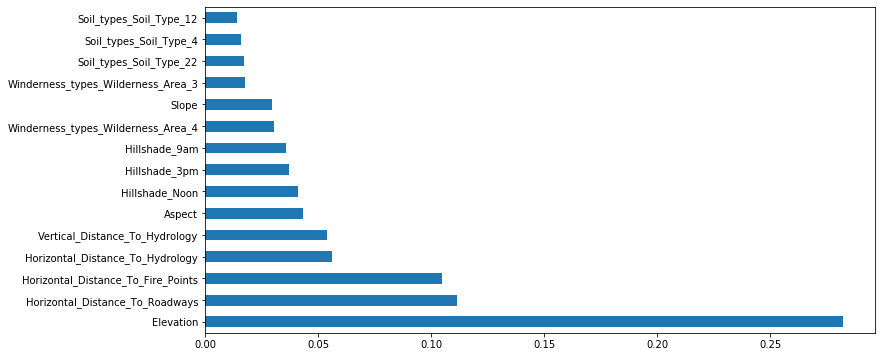

In [ ]:
plt.figure(figsize=(12,6))
pd.DataFrame(rf.feature_importances_, index = X_train.columns)[0].sort_values(ascending=False)[:15].plot(kind='barh')
plt.show()

Naive_Bayes: 0.893758, (0.000001)
Decision_Tree: 0.050889, (0.000000)
Bagged_Decision_Tree: 0.032321, (0.000000)
Random_Forest: 0.044294, (0.000002)
Boosted_Decision_Tree: 0.050956, (0.000000)
Bagged_RG_DT: 0.227109, (0.000005)


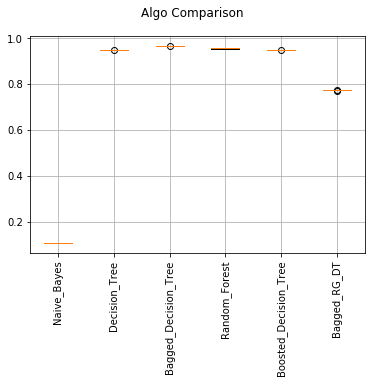

In [ ]:
modelis(X, method = 'sc', fold= 'kf')

Naive_Bayes: 0.893760, (0.000001)
Decision_Tree: 0.051142, (0.000001)
Bagged_Decision_Tree: 0.032001, (0.000001)
Random_Forest: 0.044660, (0.000001)
Boosted_Decision_Tree: 0.050984, (0.000001)
Bagged_RG_DT: 0.225786, (0.000008)


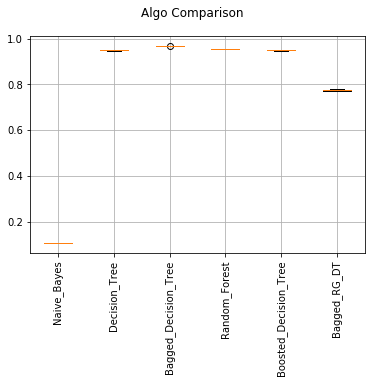

In [ ]:
modelis(X, method = 'sc', fold= 'skf')

'''Naive_Bayes: 0.893758, (0.000001)
Decision_Tree: 0.050889, (0.000000)
Bagged_Decision_Tree: 0.032321, (0.000000)
Random_Forest: 0.044294, (0.000002)
Boosted_Decision_Tree: 0.050956, (0.000000)
Bagged_RG_DT: 0.227109, (0.000005)'''

## Base Model

Naive_Bayes: 0.893396, (0.000001)
Decision_Tree: 0.050856, (0.000000)
Bagged_Decision_Tree: 0.032333, (0.000000)
Random_Forest: 0.044287, (0.000002)
Boosted_Decision_Tree: 0.050925, (0.000000)
Bagged_RG_DT: 0.227110, (0.000005)


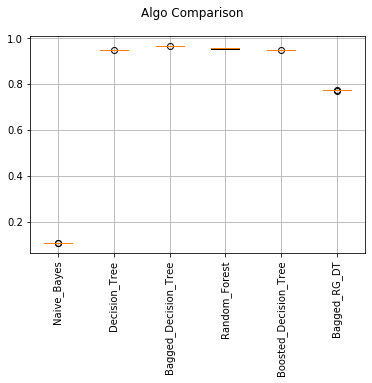

In [ ]:
modelis(X, method = 'minmax', fold= 'kf')
'''Naive_Bayes: 0.893758, (0.000001)
Decision_Tree: 0.050889, (0.000000)
Bagged_Decision_Tree: 0.032321, (0.000000)
Random_Forest: 0.044294, (0.000002)
Boosted_Decision_Tree: 0.050956, (0.000000)
Bagged_RG_DT: 0.227109, (0.000005)'''

Naive_Bayes: 0.893098, (0.000001)
Decision_Tree: 0.051120, (0.000001)
Bagged_Decision_Tree: 0.031982, (0.000001)
Random_Forest: 0.044753, (0.000001)
Boosted_Decision_Tree: 0.050997, (0.000001)
Bagged_RG_DT: 0.225795, (0.000008)


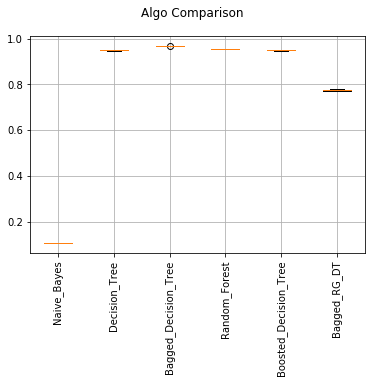

In [ ]:
modelis(X, method = 'minmax', fold= 'skf')
'''Naive_Bayes: 0.893758, (0.000001)
Decision_Tree: 0.050889, (0.000000)
Bagged_Decision_Tree: 0.032321, (0.000000)
Random_Forest: 0.044294, (0.000002)
Boosted_Decision_Tree: 0.050956, (0.000000)
Bagged_RG_DT: 0.227109, (0.000005)'''

Naive_Bayes: 0.893758, (0.000001)
Decision_Tree: 0.050866, (0.000000)
Bagged_Decision_Tree: 0.032328, (0.000000)
Random_Forest: 0.044407, (0.000002)
Boosted_Decision_Tree: 0.050989, (0.000000)
Bagged_RG_DT: 0.227111, (0.000005)


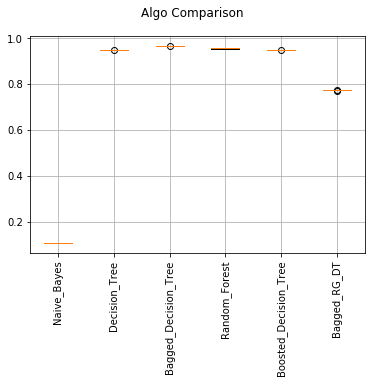

In [ ]:
modelis(X, method = 'power', fold= 'kf')
'''Naive_Bayes: 0.893758, (0.000001)
Decision_Tree: 0.050889, (0.000000)
Bagged_Decision_Tree: 0.032321, (0.000000)
Random_Forest: 0.044294, (0.000002)
Boosted_Decision_Tree: 0.050956, (0.000000)
Bagged_RG_DT: 0.227109, (0.000005)'''

Naive_Bayes: 0.893760, (0.000001)
Decision_Tree: 0.051158, (0.000001)
Bagged_Decision_Tree: 0.031959, (0.000001)
Random_Forest: 0.044682, (0.000001)
Boosted_Decision_Tree: 0.050984, (0.000001)
Bagged_RG_DT: 0.225790, (0.000008)


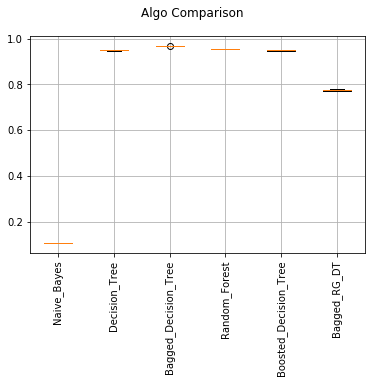

In [ ]:
modelis(X, method = 'power', fold= 'skf')
'''Naive_Bayes: 0.893758, (0.000001)
Decision_Tree: 0.050889, (0.000000)
Bagged_Decision_Tree: 0.032321, (0.000000)
Random_Forest: 0.044294, (0.000002)
Boosted_Decision_Tree: 0.050956, (0.000000)
Bagged_RG_DT: 0.227109, (0.000005)'''

#### Naive Bayes being the most underperforming model over here. Since, it is based on the Assumption that all features are independent which in our case is certainly not.

#### We aren't using Logistic Regression over here. Since, less than  50-60% of all combinations in the correlation matrix are highly correlated i.e. greater than 0.5

### MinMax Scaler + K - Fold will be used as the Base Model for our Analysis

In [ ]:
def modelis2(data, method, fold):
    dummy_feat = pd.get_dummies(data, drop_first=True)
    X = dummy_feat.drop(columns='Forest_Cover_Type_designation')
    y = dummy_feat['Forest_Cover_Type_designation']
    modelis(X, method, fold)

In [ ]:
def rf_imp(df_add_subt,i):
    dummy_feat = pd.get_dummies(df_add_subt, drop_first=True)
    X = dummy_feat.drop(columns=['Forest_Cover_Type_designation'])
    y = dummy_feat['Forest_Cover_Type_designation']

    sc= StandardScaler()

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 123)

    X_train_std = pd.DataFrame(sc.fit_transform(X_train), columns = X_train.columns)
    X_test_std = pd.DataFrame(sc.transform(X_test), columns = X_test.columns)

    rf = RandomForestClassifier(random_state = 0)
    model_1 = rf.fit(X_train_std, y_train)
    pd.DataFrame(rf.feature_importances_, index = X_train.columns)[0].sort_values(ascending=False)[:i].plot(kind='barh')

# Outlier Treatment

## Analyzing Outlier Treatment Techniques through Modeling Results

### Quantile Cut

Naive_Bayes: 0.745099, (0.000255)
Decision_Tree: 0.055413, (0.000001)
Bagged_Decision_Tree: 0.037346, (0.000001)
Random_Forest: 0.051604, (0.000002)
Boosted_Decision_Tree: 0.055398, (0.000001)
Bagged_RG_DT: 0.240875, (0.000008)


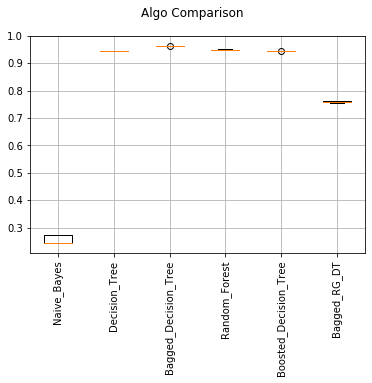

'\nBase Model:\nNaive_Bayes: 0.893396, (0.000001)\nDecision_Tree: 0.050856, (0.000000)\nBagged_Decision_Tree: 0.032333, (0.000000)\nRandom_Forest: 0.044287, (0.000002)\nBoosted_Decision_Tree: 0.050925, (0.000000)\nBagged_RG_DT: 0.227110, (0.000005)'

In [ ]:
trans_data=df.copy()
trans_data.Elevation=pd.qcut(trans_data.Elevation,q=7)
modelis2(trans_data, 'minmax', 'kf')
'''
Base Model:
Naive_Bayes: 0.893396, (0.000001)
Decision_Tree: 0.050856, (0.000000)
Bagged_Decision_Tree: 0.032333, (0.000000)
Random_Forest: 0.044287, (0.000002)
Boosted_Decision_Tree: 0.050925, (0.000000)
Bagged_RG_DT: 0.227110, (0.000005)'''

### Log Transform on Elevation

Naive_Bayes: 0.892631, (0.000001)
Decision_Tree: 0.051104, (0.000001)
Bagged_Decision_Tree: 0.031981, (0.000001)
Random_Forest: 0.044793, (0.000001)
Boosted_Decision_Tree: 0.050995, (0.000001)
Bagged_RG_DT: 0.225795, (0.000008)


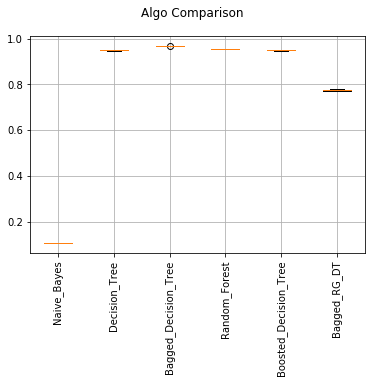

'\nBase Model:\nNaive_Bayes: 0.893396, (0.000001)\nDecision_Tree: 0.050856, (0.000000)\nBagged_Decision_Tree: 0.032333, (0.000000)\nRandom_Forest: 0.044287, (0.000002)\nBoosted_Decision_Tree: 0.050925, (0.000000)\nBagged_RG_DT: 0.227110, (0.000005)'

In [ ]:
bun_data=df.copy()

bun_data['Elevation'] = np.log1p(bun_data['Elevation'])
modelis2(bun_data, 'minmax', 'skf')
'''
Base Model:
Naive_Bayes: 0.893396, (0.000001)
Decision_Tree: 0.050856, (0.000000)
Bagged_Decision_Tree: 0.032333, (0.000000)
Random_Forest: 0.044287, (0.000002)
Boosted_Decision_Tree: 0.050925, (0.000000)
Bagged_RG_DT: 0.227110, (0.000005)'''

# Sensitivity Analysis

Firstly, we have felt that the columns Soil_types either requires `Generalization` or it needs to be `dropped out` of our analysis.

So, we have chosen to drop `Soil_types` as our first step and then we will be checking the impact of it towards modeling predictions

In [ ]:
df_w_soil = df.drop(columns = 'Soil_types')

In [ ]:
dummy_w_soil = pd.get_dummies(df_w_soil, drop_first=True)

In [ ]:
dummy_w_soil.shape

(551405, 14)

In [ ]:
dummy_w_soil.columns

Index(['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
       'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
       'Horizontal_Distance_To_Fire_Points', 'Forest_Cover_Type_designation',
       'Winderness_types_Wilderness_Area_2',
       'Winderness_types_Wilderness_Area_3',
       'Winderness_types_Wilderness_Area_4'],
      dtype='object')

In [ ]:
X = dummy_w_soil.drop(columns='Forest_Cover_Type_designation')
y = dummy_w_soil['Forest_Cover_Type_designation']


Naive_Bayes: 0.723625, (0.000004)
Decision_Tree: 0.061210, (0.000001)
Bagged_Decision_Tree: 0.037353, (0.000000)
Random_Forest: 0.046493, (0.000001)
Boosted_Decision_Tree: 0.060965, (0.000001)
Bagged_RG_DT: 0.234196, (0.000003)


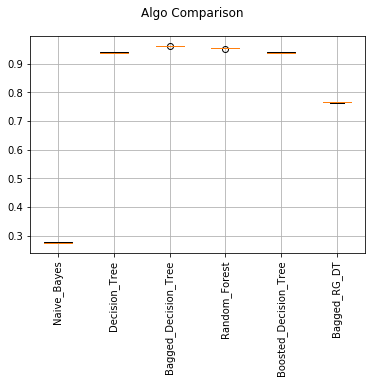

'\nBase Model:\nNaive_Bayes: 0.893396, (0.000001)\nDecision_Tree: 0.050856, (0.000000)\nBagged_Decision_Tree: 0.032333, (0.000000)\nRandom_Forest: 0.044287, (0.000002)\nBoosted_Decision_Tree: 0.050925, (0.000000)\nBagged_RG_DT: 0.227110, (0.000005)'

In [ ]:
modelis(X, 'minmax', 'kf')
'''
Base Model:
Naive_Bayes: 0.893396, (0.000001)
Decision_Tree: 0.050856, (0.000000)
Bagged_Decision_Tree: 0.032333, (0.000000)
Random_Forest: 0.044287, (0.000002)
Boosted_Decision_Tree: 0.050925, (0.000000)
Bagged_RG_DT: 0.227110, (0.000005)'''

Hence, by dropping the variable means dropping some important intelligence as none of the models are performing better than the base modelling.

The model still being Naive Bayes.

#### Therefore, dropping Soil Types was a bad decision. Hence, we will try to Generalize this column in further experiments.

# Feature Engineering

For now, we will be using the basic concept of Pythogoras theorem upon Vertical & Horizontal Distance to Hydrology to create a new feature `'Shortest_Distance_to_Hydrology'`

In [ ]:
df_feat = df.copy()

In [ ]:
df_feat['Shortest_Distance_to_Hydrology'] = np.sqrt(df['Horizontal_Distance_To_Hydrology']**2 + df['Vertical_Distance_To_Hydrology']**2)

Naive_Bayes: 0.893395, (0.000001)
Decision_Tree: 0.052043, (0.000000)
Bagged_Decision_Tree: 0.032595, (0.000000)
Random_Forest: 0.044376, (0.000003)
Boosted_Decision_Tree: 0.052102, (0.000001)
Bagged_RG_DT: 0.226821, (0.000005)


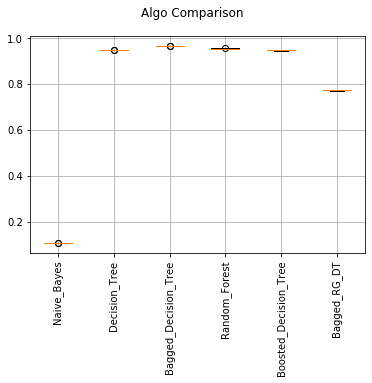

'\nBase Model:\nNaive_Bayes: 0.893396, (0.000001)\nDecision_Tree: 0.050856, (0.000000)\nBagged_Decision_Tree: 0.032333, (0.000000)\nRandom_Forest: 0.044287, (0.000002)\nBoosted_Decision_Tree: 0.050925, (0.000000)\nBagged_RG_DT: 0.227110, (0.000005)'

In [ ]:
modelis2(df_feat, 'minmax', 'kf')
'''
Base Model:
Naive_Bayes: 0.893396, (0.000001)
Decision_Tree: 0.050856, (0.000000)
Bagged_Decision_Tree: 0.032333, (0.000000)
Random_Forest: 0.044287, (0.000002)
Boosted_Decision_Tree: 0.050925, (0.000000)
Bagged_RG_DT: 0.227110, (0.000005)'''

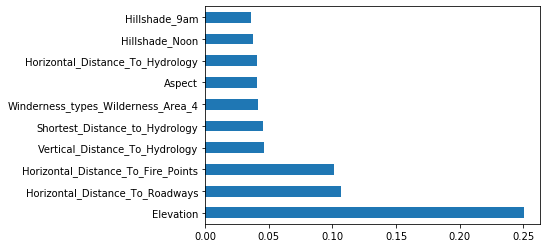

In [ ]:
rf_imp(df_feat,10)

#### Naive Bayes continues to dissappoint in the predictions. The Bagged Decision Tree is a clear winner still.

The overall effect of this new feature doesn't actually make a difference in our analysis

Lets make another feature taking the means of all the 3 Hillshade index columns. Since, they are representing similar characteristics

In [1]:
df_hill_mean = df.copy()
df_hill_mean['Hillshade_mean'] = round((df['Hillshade_9am'] + df['Hillshade_Noon'] + df['Hillshade_3pm'])/3,2)
df_hill_mean.columns


NameError: ignored

In [ ]:
df_hill_mean.head()

In [ ]:
modelis2(df_hill_mean, 'minmax', 'kf')

'''
Base Model:
Naive_Bayes: 0.893396, (0.000001)
Decision_Tree: 0.050856, (0.000000)
Bagged_Decision_Tree: 0.032333, (0.000000)
Random_Forest: 0.044287, (0.000002)
Boosted_Decision_Tree: 0.050925, (0.000000)
Bagged_RG_DT: 0.227110, (0.000005)'''

In [ ]:
rf_imp(df_hill_mean,10)

##### Even after adding this feature we find no real improvement in our calculations as per the results of the base model

# Feature Engineering from Domain Knowledge

### Hillshade Algorithm

As per the Hillshade Algorithm, features like Slope should be transformed to radians first and then take its `cosine` as well `sine` components as new features for our analysis

Hillshade = 255.0 * ((cos(Zenith_rad) * cos(Slope_rad)) +
                 (sin(Zenith_rad) * sin(Slope_rad) * cos(Azimuth_rad - Aspect_rad)))

Reference: https://pro.arcgis.com/en/pro-app/tool-reference/3d-analyst/how-hillshade-works.htm

In [ ]:
df_sin_cos = df.copy()

In [ ]:
import math
df_sin_cos['Slope_rad'] = (math.pi/180)*(df_sin_cos['Slope'])

In [ ]:
df_sin_cos['Slope_rad_sin'] = np.sin(df_sin_cos['Slope_rad'])
df_sin_cos['Slope_rad_cos'] = np.cos(df_sin_cos['Slope_rad'])

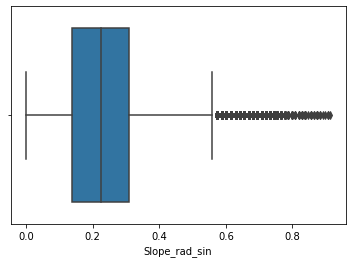

In [ ]:
sns.boxplot(df_sin_cos['Slope_rad_sin'])

Naive_Bayes: 0.889774, (0.000004)
Decision_Tree: 0.051069, (0.000000)
Bagged_Decision_Tree: 0.032371, (0.000000)
Random_Forest: 0.052470, (0.000001)
Boosted_Decision_Tree: 0.051273, (0.000000)
Bagged_RG_DT: 0.227108, (0.000005)


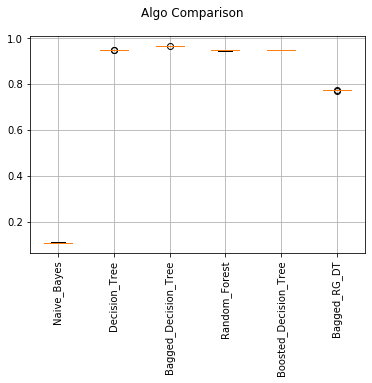

'\nBase Model:\nNaive_Bayes: 0.893396, (0.000001)\nDecision_Tree: 0.050856, (0.000000)\nBagged_Decision_Tree: 0.032333, (0.000000)\nRandom_Forest: 0.044287, (0.000002)\nBoosted_Decision_Tree: 0.050925, (0.000000)\nBagged_RG_DT: 0.227110, (0.000005)'

In [ ]:
modelis2(df_sin_cos, 'minmax', 'kf')
'''
Base Model:
Naive_Bayes: 0.893396, (0.000001)
Decision_Tree: 0.050856, (0.000000)
Bagged_Decision_Tree: 0.032333, (0.000000)
Random_Forest: 0.044287, (0.000002)
Boosted_Decision_Tree: 0.050925, (0.000000)
Bagged_RG_DT: 0.227110, (0.000005)'''

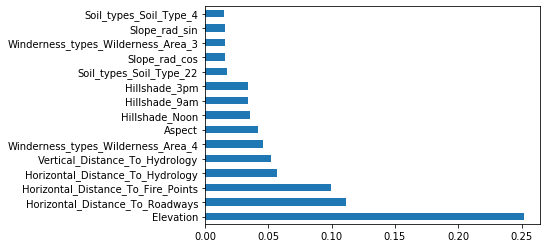

In [ ]:
rf_imp(df_sin_cos,15)

##### In this particular case, it is clear that this feature engineering has improved the results for Naive Bayes & Decision Tree.

Overall, this feature engineering might turn out to be a better one as compared to the original model.

### Adding & Subtracting Distance Features.

We can form some more features by `adding and subtracting various distances` in order to extract better intelligence as a whole.

We will also be reworking Shortest distance Feature engineering for hydrology just for experimental purposes

In [ ]:
df.columns

Index(['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
       'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
       'Horizontal_Distance_To_Fire_Points', 'Forest_Cover_Type_designation',
       'Soil_types', 'Winderness_types'],
      dtype='object')

In [ ]:
df_add_subt = df.copy()
df_add_subt['Road_p_Fire'] = df_add_subt['Horizontal_Distance_To_Roadways'] + df_add_subt['Horizontal_Distance_To_Fire_Points']
df_add_subt['Road_s_Fire'] = df_add_subt['Horizontal_Distance_To_Roadways'] - df_add_subt['Horizontal_Distance_To_Fire_Points']
df_add_subt['Hyd_s_Fire'] = df_add_subt['Horizontal_Distance_To_Hydrology'] - df_add_subt['Horizontal_Distance_To_Fire_Points']
df_add_subt['Hyd_p_Fire'] = df_add_subt['Horizontal_Distance_To_Hydrology'] + df_add_subt['Horizontal_Distance_To_Fire_Points']
df_add_subt['Hyd_p_Road'] = df_add_subt['Horizontal_Distance_To_Hydrology'] + df_add_subt['Horizontal_Distance_To_Roadways']
df_add_subt['Hyd_s_Road'] = df_add_subt['Horizontal_Distance_To_Hydrology'] - df_add_subt['Horizontal_Distance_To_Roadways']
df_add_subt['Shortest_Distance_to_Hydrology'] = np.sqrt(df['Horizontal_Distance_To_Hydrology']**2 + df['Vertical_Distance_To_Hydrology']**2)



Naive_Bayes: 0.888753, (0.000001)
Decision_Tree: 0.043915, (0.000001)
Bagged_Decision_Tree: 0.025997, (0.000000)
Random_Forest: 0.025135, (0.000000)
Boosted_Decision_Tree: 0.044143, (0.000001)
Bagged_RG_DT: 0.226053, (0.000005)


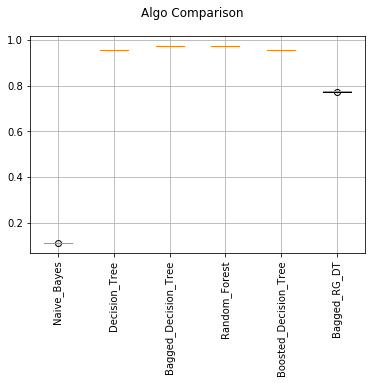

'\nBase Model:\nNaive_Bayes: 0.893396, (0.000001)\nDecision_Tree: 0.050856, (0.000000)\nBagged_Decision_Tree: 0.032333, (0.000000)\nRandom_Forest: 0.044287, (0.000002)\nBoosted_Decision_Tree: 0.050925, (0.000000)\nBagged_RG_DT: 0.227110, (0.000005)'

In [ ]:
modelis2(df_add_subt, 'minmax', 'kf')

'''
Base Model:
Naive_Bayes: 0.893396, (0.000001)
Decision_Tree: 0.050856, (0.000000)
Bagged_Decision_Tree: 0.032333, (0.000000)
Random_Forest: 0.044287, (0.000002)
Boosted_Decision_Tree: 0.050925, (0.000000)
Bagged_RG_DT: 0.227110, (0.000005)'''

##### Except Naive Bayes, all other modelling techniques have shown great promise and considerable improvement in terms of modeling predictions.

Let's have a look at Random Forest's Feature Importance to see which features among all these performed the best.

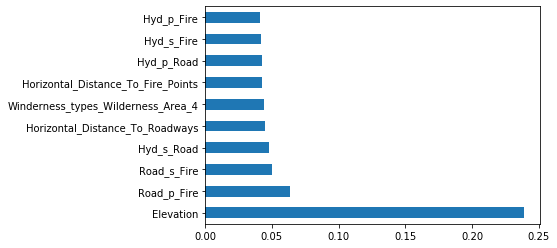

In [ ]:
rf_imp(df_add_subt,10)

In [ ]:
df.columns

Index(['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
       'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
       'Horizontal_Distance_To_Fire_Points', 'Forest_Cover_Type_designation',
       'Soil_types', 'Winderness_types'],
      dtype='object')

### Exploring similar interaction between Hillshade Indexes

Let's engineer some features both on the basis of addition, subtraction and multiplication upon Hill Shadow indexes measures at 3 times

In [ ]:
df_mul_sub_p = df.copy()
df_mul_sub_p['Hillshade_9am_p_Noon'] = df['Hillshade_9am'] + df['Hillshade_Noon']
df_mul_sub_p['Hillshade_3pm_p_Noon'] = df['Hillshade_3pm'] + df['Hillshade_Noon']
df_mul_sub_p['Hillshade_9am_p_3pm'] = df['Hillshade_9am'] + df['Hillshade_3pm']
df_mul_sub_p['Hillshade_9am_s_Noon'] = df['Hillshade_9am'] - df['Hillshade_Noon']
df_mul_sub_p['Hillshade_3pm_s_Noon'] = df['Hillshade_Noon'] - df['Hillshade_3pm']
df_mul_sub_p['Hillshade_9am_s_3pm'] = df['Hillshade_9am'] - df['Hillshade_3pm']
df_mul_sub_p['Hillshade_9am_m_Noon'] = df['Hillshade_9am'] * df['Hillshade_Noon']
df_mul_sub_p['Hillshade_3pm_m_Noon'] = df['Hillshade_Noon'] * df['Hillshade_3pm']
df_mul_sub_p['Hillshade_9am_m_3pm'] = df['Hillshade_9am'] * df['Hillshade_3pm']

Naive_Bayes: 0.893313, (0.000001)
Decision_Tree: 0.053919, (0.000000)
Bagged_Decision_Tree: 0.034211, (0.000000)
Random_Forest: 0.069311, (0.000002)
Boosted_Decision_Tree: 0.053801, (0.000000)
Bagged_RG_DT: 0.227064, (0.000005)


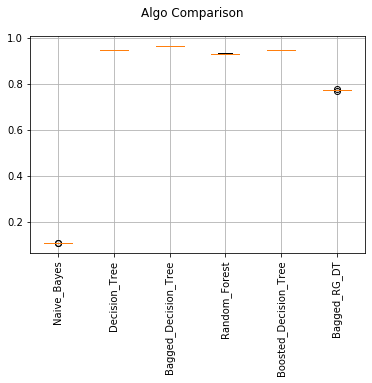

'\nBase Model:\nNaive_Bayes: 0.893396, (0.000001)\nDecision_Tree: 0.050856, (0.000000)\nBagged_Decision_Tree: 0.032333, (0.000000)\nRandom_Forest: 0.044287, (0.000002)\nBoosted_Decision_Tree: 0.050925, (0.000000)\nBagged_RG_DT: 0.227110, (0.000005)'

In [ ]:
modelis2(df_mul_sub_p, 'minmax', 'kf')
'''
Base Model:
Naive_Bayes: 0.893396, (0.000001)
Decision_Tree: 0.050856, (0.000000)
Bagged_Decision_Tree: 0.032333, (0.000000)
Random_Forest: 0.044287, (0.000002)
Boosted_Decision_Tree: 0.050925, (0.000000)
Bagged_RG_DT: 0.227110, (0.000005)'''

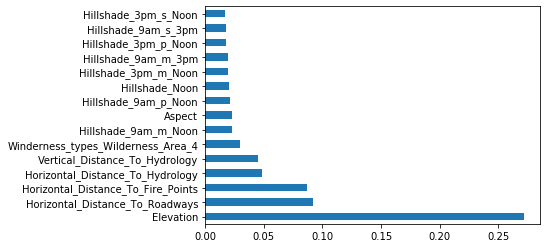

In [ ]:
rf_imp(df_mul_sub_p,15)

In [ ]:
df_mul_sub_p.columns

Index(['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
       'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
       'Horizontal_Distance_To_Fire_Points', 'Forest_Cover_Type_designation',
       'Soil_types', 'Winderness_types', 'Hillshade_9am_p_Noon',
       'Hillshade_3pm_p_Noon', 'Hillshade_9am_p_3pm', 'Hillshade_9am_s_Noon',
       'Hillshade_3pm_s_Noon', 'Hillshade_9am_s_3pm', 'Hillshade_9am_m_Noon',
       'Hillshade_3pm_m_Noon', 'Hillshade_9am_m_3pm'],
      dtype='object')

#   Study Code USFS ELU Code			Description
- 1	   2702	1	Cathedral family - Rock outcrop complex, extremely stony.
- 2	   2703	2	Vanet - Ratake families complex, very stony.
- 3	   2704	3	Haploborolis - Rock outcrop complex, rubbly.
- 4	   2705	4	Ratake family - Rock outcrop complex, rubbly.
- 5	   2706	2	Vanet family - Rock outcrop complex complex, rubbly.
- 6	   2717	2	Vanet - Wetmore families - Rock outcrop complex, stony.
- 7	   3501	5	Gothic family.
- 8	   3502	6	Supervisor - Limber families complex.
- 9	   4201	7	Troutville family, very stony.
- 10	 4703  8	Bullwark - Catamount families - Rock outcrop complex, rubbly.
- 11	   4704	8	Bullwark - Catamount families - Rock land complex, rubbly.
- 12	   4744	9	Legault family - Rock land complex, stony.
- 13	   4758	10	Catamount family - Rock land - Bullwark family complex, rubbly.
- 14	   5101	11	Pachic Argiborolis - Aquolis complex.
- 15	   5151	12	unspecified in the USFS Soil and ELU Survey.
- 16	   6101	13 	Cryaquolis - Cryoborolis complex.
- 17	   6102	14	Gateview family - Cryaquolis complex.
- 18	   6731	15	Rogert family, very stony.
- 19	   7101	13	Typic Cryaquolis - Borohemists complex.
- 20	   7102	14	Typic Cryaquepts - Typic Cryaquolls complex.

- 21	   7103 15		Typic Cryaquolls - Leighcan family, till substratum complex.
- 22	   7201	16	Leighcan family, till substratum, extremely bouldery.
- 23	   7202	16	Leighcan family, till substratum - Typic Cryaquolls complex.
- 24	   7700	16	Leighcan family, extremely stony.
- 25	   7701	16	Leighcan family, warm, extremely stony.
- 26	   7702	17	Granile - Catamount families complex, very stony.
- 27	   7709	16	Leighcan family, warm - Rock outcrop complex, extremely stony.
- 28	   7710	16	Leighcan family - Rock outcrop complex, extremely stony.
- 29	   7745	18	Como - Legault families complex, extremely stony.
- 30	   7746	18	Como family - Rock land - Legault family complex, extremely stony.
- 31	   7755	16	Leighcan - Catamount families complex, extremely stony.
- 32	   7756	10	Catamount family - Rock outcrop - Leighcan family complex, extremely stony.
- 33	   7757	16	Leighcan - Catamount families - Rock outcrop complex, extremely stony.
- 34	   7790	19	Cryorthents - Rock land complex, extremely stony.
- 35	   8703	20	Cryumbrepts - Rock outcrop - Cryaquepts complex.
- 36	   8707	21	Bross family - Rock land - Cryumbrepts complex, extremely stony.
- 37	   8708	20	Rock outcrop - Cryumbrepts - Cryorthents complex, extremely stony.
- 38	   8771	16	Leighcan - Moran families - Cryaquolls complex, extremely stony.
- 39	   8772	19	Moran family - Cryorthents - Leighcan family complex, extremely stony.
- 40	   8776	19	Moran family - Cryorthents - Rock land complex, extremely stony.

In [ ]:
cat = df.select_dtypes(include='object')
le = LabelEncoder()
for i in cat.columns:
    cat[i] = le.fit_transform(cat[i])+1
cat['Forest_Cover_Type_designation'] = df['Forest_Cover_Type_designation']
cat.head()

,Soil_types,Winderness_types,Forest_Cover_Type_designation
2,4,1,2
3,23,1,2
5,21,1,2
11,23,1,2
12,23,1,2


In [ ]:
stony = {1,2,6,9,12,18, 24,25,26,27,28,29,30,31,32,33,34,36,37,38,39,40}
others = {7,8,14,15,16,17,19,20, 21, 22,23,35}
rubble = {i for i in range(1,41)}-stony-others
rubble

{3, 4, 5, 10, 11, 13}

In [ ]:
cat['Soil_types_bin'] = cat['Soil_types'].apply(lambda x: 'rubble' if x in rubble else 'others' if x in others else 'stony')


In [ ]:
df_soil_bin = df.copy()
df_soil_bin['Soil_types_bin'] = cat['Soil_types_bin']
df_soil_bin.drop(columns='Soil_types', inplace = True)

Naive_Bayes: 0.631163, (0.000004)
Decision_Tree: 0.057451, (0.000000)
Bagged_Decision_Tree: 0.034926, (0.000001)
Random_Forest: 0.046074, (0.000002)
Boosted_Decision_Tree: 0.057562, (0.000001)
Bagged_RG_DT: 0.233325, (0.000002)


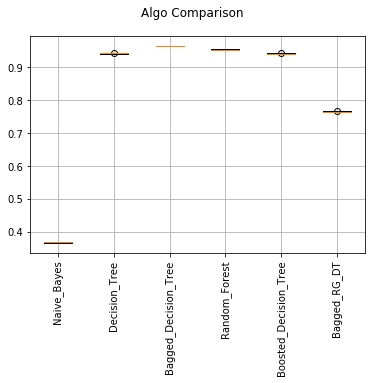

'\nBase Model:\nNaive_Bayes: 0.893396, (0.000001)\nDecision_Tree: 0.050856, (0.000000)\nBagged_Decision_Tree: 0.032333, (0.000000)\nRandom_Forest: 0.044287, (0.000002)\nBoosted_Decision_Tree: 0.050925, (0.000000)\nBagged_RG_DT: 0.227110, (0.000005)'

In [ ]:
modelis2(df_soil_bin, 'minmax', 'kf')

'''
Base Model:
Naive_Bayes: 0.893396, (0.000001)
Decision_Tree: 0.050856, (0.000000)
Bagged_Decision_Tree: 0.032333, (0.000000)
Random_Forest: 0.044287, (0.000002)
Boosted_Decision_Tree: 0.050925, (0.000000)
Bagged_RG_DT: 0.227110, (0.000005)'''

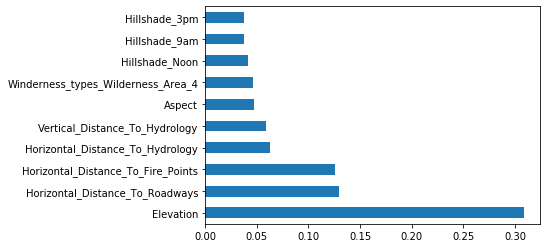

In [ ]:
rf_imp(df_soil_bin,10)